# 🚀 ETSI-Watchdog Drift Detection Demo (GSSoC'25)
This notebook demonstrates how **ETSI-Watchdog** can be used to monitor **data drift** using:
- ✅ PSI-based statistical drift
- ✅ KS-test based univariate drift
- 📜 Logging drift results for monitoring
- 📈 Visualizing drift trends

🛠️ All techniques are designed for real-world ML pipelines.



Install & Import ETSI-Watchdog


In [ ]:
! pip install etsi-watchdog

Defaulting to user installation because normal site-packages is not writeable


# 📊 PSI Drift Detection using `etsi-watchdog`

## 🧠 Objective  
This notebook demonstrates how to perform **Population Stability Index (PSI)**-based drift detection using the `etsi-watchdog` library. We compare two datasets — a reference dataset (normal data) and a production dataset (new data) — to identify if any **feature distribution drift** has occurred.


In [8]:
import numpy as np
import pandas as pd
from etsi.watchdog.drift.factory import get_drift_function

# Step 1: Generate synthetic reference and production datasets
np.random.seed(42)
reference_data = pd.DataFrame({'feature': np.random.normal(0, 1, 1000)})
production_data = pd.DataFrame({'feature': np.random.normal(0.5, 1, 1000)})

# Step 2: Get the PSI drift detection function
drift_fn = get_drift_function("psi")

# Step 3: Run drift detection for the 'feature' column
drift_result = drift_fn(reference_data, production_data, "feature")

# Step 4: Print result details
print("PSI Drift Result:")
print(drift_result)

# Step 5: Print interpretation
if drift_result.score > drift_result.threshold:
    print("\n⚠️ Drift Detected!")
else:
    print("\n✅ No Significant Drift Detected.")





PSI Drift Result:
DriftResult(method='psi', score=0.3018862768711229, threshold=0.2, details={'bins': ['-3.24--2.53', '-2.53--1.82', '-1.82--1.11', '-1.11--0.40', '-0.40-0.31', '0.31-1.02', '1.02-1.72', '1.72-2.43', '2.43-3.14', '3.14-3.85'], 'expected_percents': [0.004, 0.022, 0.096, 0.228, 0.272, 0.226, 0.104, 0.038, 0.009, 0.001], 'actual_percents': [0.0, 0.012, 0.033, 0.119, 0.224, 0.29, 0.203, 0.087, 0.029, 0.003], 'psi_per_bin': [0, 0.006061358035703154, 0.06727395969008543, 0.07087421280687736, 0.009319488693165966, 0.01595813911732695, 0.06621269291014108, 0.04058777598748169, 0.0234014250530051, 0.0021972245773362194]}, sample_size=1000)

⚠️ Drift Detected!


## 🧪 Kolmogorov-Smirnov (KS) Test for Drift Detection

This notebook demonstrates how to use the **KS Test** to detect data drift between a reference dataset and a production dataset.

### 🔧 Step-by-Step Approach:

1. **Dataset Preparation**:
   - Generated synthetic `reference_data` using `np.random.normal(0, 1, 1000)`.
   - Generated `production_data` using `np.random.normal(0.5, 1, 1000)` to simulate drift.

2. **KS Test Application**:
   - Used `scipy.stats.ks_2samp()` to perform the test.
   - This tests whether the two samples are drawn from the same distribution.

3. **Interpretation**:
   - Compared the p-value with a significance level of 0.05.
   - If `p < 0.05`, we conclude that the feature distribution has changed (drift is present).

4. **Result**:
   - Printed the KS Statistic and p-value.
   - Visualized the two distributions using histograms for intuitive understanding.

This approach is useful when you want a **statistical and interpretable** way to detect changes in a single numerical feature.


KS Test Statistic: 0.242
P-Value: 4.2252283893369713e-26

⚠️ Drift Detected (Distributions are different)


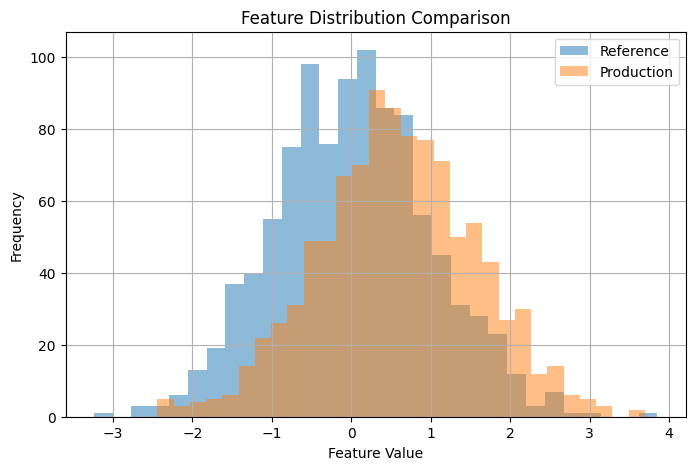

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Step 1: Create synthetic reference and production datasets
np.random.seed(42)
reference_data = pd.DataFrame({'feature': np.random.normal(0, 1, 1000)})
production_data = pd.DataFrame({'feature': np.random.normal(0.5, 1, 1000)})

# Step 2: Run KS test
ks_stat, p_value = ks_2samp(reference_data['feature'], production_data['feature'])

# Step 3: Print the result
print("KS Test Statistic:", ks_stat)
print("P-Value:", p_value)

# Step 4: Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("\n⚠️ Drift Detected (Distributions are different)")
else:
    print("\n✅ No Significant Drift Detected (Distributions are similar)")

# Optional: Visualization
plt.figure(figsize=(8, 5))
plt.hist(reference_data['feature'], bins=30, alpha=0.5, label='Reference')
plt.hist(production_data['feature'], bins=30, alpha=0.5, label='Production')
plt.title("Feature Distribution Comparison")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()



## 🧪 KS-Test Based Drift Detection (Univariate)

In this section, we demonstrate how to use the **Kolmogorov–Smirnov (KS) Test** to detect **feature-wise drift** between a reference dataset and a production dataset.

### 🔍 What is KS-Test?
The KS-Test is a **non-parametric test** that measures the distance between the cumulative distributions of two datasets. It’s useful for detecting **distributional changes (drift)** in numeric features.

---

### 📁 Step 1: Create Synthetic Datasets

We simulate two datasets:
- **Reference Data**: Normal distribution around a known mean
- **Production Data**: Some features intentionally drifted (e.g., shifted mean)

---

### 🧪 Step 2: Perform KS-Test on Each Feature

For each feature:
- We compute the **KS statistic** and **p-value**
- If `p-value < 0.05`, drift is considered **significant** ✅

---

### 📋 Step 3: Results Table

We display a table showing:
- KS statistic  
- P-value  
- Whether **drift was detected**

---

### 📊 Step 4: Visualize KS Statistic

A simple bar chart of KS statistics helps:
- Compare drift levels across features
- Quickly spot which features show **high deviation**

---

🎯 **Threshold:** We use a visual guideline of `KS statistic = 0.1` as a practical threshold for significance.

---



📋 Drift Detection Table (KS Test):

    Feature  KS Statistic   P-Value Drift Detected
0  feature1         0.206  0.000000              ✅
1  feature2         0.054  0.108287              ❌
2  feature3         0.250  0.000000              ✅


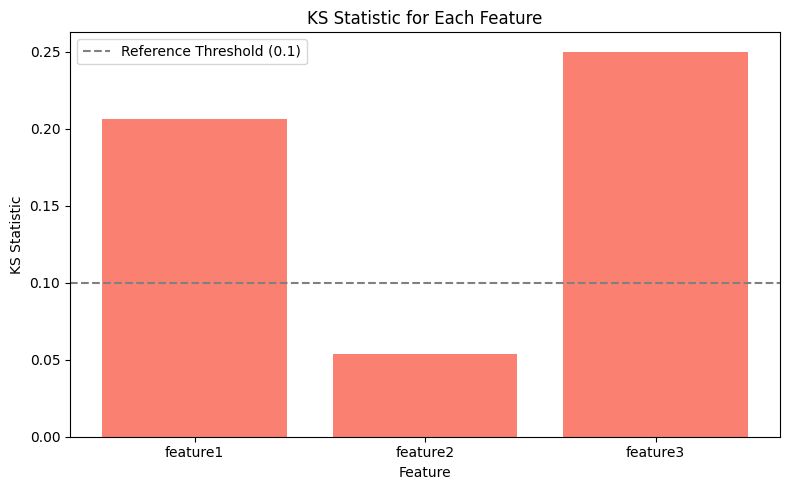

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Step 1: Create synthetic data
np.random.seed(42)
reference_data = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.normal(5, 2, 1000),
    'feature3': np.random.normal(10, 3, 1000),
})

production_data = pd.DataFrame({
    'feature1': np.random.normal(0.5, 1, 1000),   # drifted
    'feature2': np.random.normal(5, 2, 1000),     # no drift
    'feature3': np.random.normal(12, 3, 1000),    # drifted
})

# Step 2: Perform KS Test for each feature
drift_results = []

for feature in reference_data.columns:
    stat, p_value = ks_2samp(reference_data[feature], production_data[feature])
    drift_detected = p_value < 0.05
    drift_results.append({
        'Feature': feature,
        'KS Statistic': round(stat, 3),
        'P-Value': round(p_value, 6),
        'Drift Detected': '✅' if drift_detected else '❌'
    })

# Convert to DataFrame
drift_df = pd.DataFrame(drift_results)

# Step 3: Print Drift Table
print("\n📋 Drift Detection Table (KS Test):\n")
print(drift_df)

# Step 4: Bar Plot of KS Statistics
plt.figure(figsize=(8, 5))
plt.bar(drift_df['Feature'], drift_df['KS Statistic'], color='salmon')
plt.axhline(y=0.1, color='gray', linestyle='--', label='Reference Threshold (0.1)')
plt.title('KS Statistic for Each Feature')
plt.xlabel('Feature')
plt.ylabel('KS Statistic')
plt.legend()
plt.tight_layout()
plt.show()


## 🧾 Drift Logging Utility

This module provides a reusable function to **log drift detection results** during model monitoring workflows. Logging drift events enables:

- 📈 Tracking drift over time
- 🧩 Debugging data pipeline issues
- 🚨 Creating dashboards or alerts

---

### 📂 `utils/log_drift_result.py`

#### ✅ Function: `log_drift_result(...)`

This function logs each drift detection event with metadata like:
- `timestamp` – When the test was run
- `feature` – Name of the feature tested
- `method` – Method used (e.g., KS Test, PSI)
- `score` – Drift score/statistic
- `threshold` – Threshold used for detection
- `drift` – Boolean or label indicating if drift was detected

---

### ✍️ Supported Output Formats

| Format | Description |
|--------|-------------|
| `.csv` | Appends results as new rows (good for spreadsheets, DataFrames) |
| `.json` | Appends results in a list (good for APIs, visualization tools) |

If the path does not exist, the function creates it automatically.

---

### ⚠️ Unsupported Format Handling

If an unsupported format is passed (e.g., `.txt`), a warning is shown using the `warnings` module, but the script does **not crash**.

---

### 📌 Example Usage

```python
log_drift_result(
    method='KS Test',
    feature='feature1',
    score=0.23,
    threshold=0.1,
    drift=True,
    path='logs/drift_log.csv'
)


In [13]:
# utils/log_drift_result.py
import pandas as pd
import json
from datetime import datetime
from pathlib import Path
import warnings

def log_drift_result(method, feature, score, threshold, drift, path):
    timestamp = datetime.now().isoformat()

    row = {
        "timestamp": timestamp,
        "feature": feature,
        "method": method,
        "score": score,
        "threshold": threshold,
        "drift": drift
    }

    path_obj = Path(path)
    path_obj.parent.mkdir(parents=True, exist_ok=True)

    if path_obj.suffix == ".csv":
        df = pd.DataFrame([row])
        if not path_obj.exists():
            df.to_csv(path_obj, index=False)
        else:
            df.to_csv(path_obj, mode='a', header=False, index=False)

    elif path_obj.suffix == ".json":
        if path_obj.exists():
            try:
                existing = json.loads(path_obj.read_text())
                if not isinstance(existing, list):
                    existing = []
            except json.JSONDecodeError:
                existing = []
        else:
            existing = []
        existing.append(row)
        path_obj.write_text(json.dumps(existing, indent=2))
    else:
        warnings.warn(f"Unsupported file format: {path_obj.suffix}")


### 📜 Drift Detection Logging & Monitoring

In [ ]:
# ✅ 1. Explanation: 

# In real-world ML systems, it’s important not just to detect drift but also to log each drift detection event with a timestamp, feature, score, and status.
# This enables:
# - Tracking feature-wise drift over time
# - Creating dashboards or alerts based on logs
# - Debugging and improving data pipelines

# Below, we demonstrate how drift logs are written to CSV or JSON using custom logging functions inspired by ETSI-Watchdog.

# ✅ 2. Logging Code

from datetime import datetime
import json
import pandas as pd
from pathlib import Path

def log_drift_result(psi_scores, drift_status, path: str):
    timestamp = datetime.now().isoformat()
    row = {
        "timestamp": timestamp,
        "drift": drift_status,
        **psi_scores
    }

    path_obj = Path(path)
    path_obj.parent.mkdir(parents=True, exist_ok=True)

    if path_obj.suffix == ".csv":
        df = pd.DataFrame([row])
        if not path_obj.exists():
            df.to_csv(path_obj, index=False)
        else:
            df.to_csv(path_obj, mode='a', header=False, index=False)

    elif path_obj.suffix == ".json":
        if path_obj.exists():
            try:
                existing = json.loads(path_obj.read_text())
                if not isinstance(existing, list):
                    existing = []
            except json.JSONDecodeError:
                existing = []
        else:
            existing = []

        existing.append(row)
        path_obj.write_text(json.dumps(existing, indent=2))

# ✅ 3. Example Usage

# Example KS test result
psi_scores = {"feature1": 0.242, "feature2": 0.19}
drift_status = "⚠️ Drift Detected"
log_drift_result(psi_scores, drift_status, "logs/ks_drift_log.json")

# ✅ 4. Display Logs in Notebook

log_df = pd.read_json("logs/ks_drift_log.json")
log_df.tail()

# ✅ 5. Conclusion (Markdown)
# Drift logs are now available in `logs/ks_drift_log.json` and can be reviewed for trend analysis, alerts, or even automated retraining triggers.



,timestamp,drift,feature1,feature2
0,2025-07-25 16:26:06.268190,⚠️ Drift Detected,0.242,0.19
